In [42]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [43]:
with open("simu5_data/simu5_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 30]
# df_test = df_test.loc[df_test.session < 30]

In [44]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,list,session
0,1071,857,PIMPLE,MAILBOX,0,0
1,309,1029,CIGARETTE,PAW,0,0
2,624,700,GARLIC,HEEL,0,0
3,195,1389,BULLETIN,STRANGER,0,0
4,580,392,FLIPPER,COUSIN,0,0
...,...,...,...,...,...,...
467995,1281,1100,SHELL,POLYESTER,77,999
467996,1511,421,TROUT,CUCUMBER,77,999
467997,1269,640,SERGEANT,GLASSES,77,999
467998,1495,1017,TRAITOR,PARTNER,77,999


In [45]:
df_test

,test_itemno,test_item,correct_ans,lag,list,session
0,580,FLIPPER,392,1,0,0
1,744,IRON,245,3,1,0
2,316,CLAMP,958,5,2,0
3,109,BEAVER,1326,2,3,0
4,768,KANGAROO,1632,0,4,0
...,...,...,...,...,...,...
77995,129,BIRD,67,4,73,999
77996,616,FURNITURE,1451,5,74,999
77997,1082,PLANET,344,4,75,999
77998,100,BATHTUB,192,5,76,999


### Run CMR-IA

In [46]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [47]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_cue = 0.45,
    beta_distract = 0.1,
    beta_rec_post = 0.99,
    gamma_fc = 0.7,
    gamma_cf = 0.5,
    s_fc = 0.1,
    s_cf = 0.1,
    c_thresh = 0.01,
    kappa = 0.08,
    lamb = 0.05,
    eta = 0.02,
    phi_s = 1.6,  # control the overall f_dif correct
    phi_d = 1.1,  # control the curve of last three, higher then upper, mediated by phi_s 
    nitems_in_accumulator = 48,
    d_ass = 0.8,
    alpha = 0.5,
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.5,
 'beta_cue': 0.45,
 'beta_rec_post': 0.99,
 'beta_distract': 0.1,
 'phi_s': 1.6,
 'phi_d': 1.1,
 's_cf': 0.1,
 's_fc': 0.1,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 5,
 'alpha': 0.5,
 'c_thresh': 0.01,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.5,
 'd_ass': 0.8,
 'lamb': 0.05,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 48,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.7,
 'gamma_cf': 0.5}

In [48]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 5262.229571580887


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,580,1605.0,1590.0,0.893381
1,1,0,744,245.0,2100.0,0.794697
2,2,0,316,1583.0,2300.0,0.836788
3,3,0,109,1326.0,2180.0,0.833527
4,4,0,768,1632.0,1610.0,0.943819
...,...,...,...,...,...,...
77995,73,999,129,67.0,3510.0,0.726534
77996,74,999,616,1451.0,1810.0,0.607018
77997,75,999,1082,257.0,3600.0,0.839213
77998,76,999,100,688.0,3260.0,0.842231


In [49]:
df_simu = df_simu.merge(df_test,on=['session','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list_x,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,list_y,correct
0,0,0,580,1605.0,1590.0,0.893381,FLIPPER,392,1,0,False
1,1,0,744,245.0,2100.0,0.794697,IRON,245,3,1,True
2,2,0,316,1583.0,2300.0,0.836788,CLAMP,958,5,2,False
3,3,0,109,1326.0,2180.0,0.833527,BEAVER,1326,2,3,True
4,4,0,768,1632.0,1610.0,0.943819,KANGAROO,1632,0,4,True
...,...,...,...,...,...,...,...,...,...,...,...
77995,73,999,129,67.0,3510.0,0.726534,BIRD,67,4,73,True
77996,74,999,616,1451.0,1810.0,0.607018,FURNITURE,1451,5,74,True
77997,75,999,1082,257.0,3600.0,0.839213,PLANET,344,4,75,False
77998,76,999,100,688.0,3260.0,0.842231,BATHTUB,192,5,76,False


In [50]:
# f_in

In [51]:
sessions = df_simu.session.to_numpy()
for sess in sessions:
    df_tmp = df_study.loc[df_study.session == sess]
    tmp1 = df_tmp.study_itemno1.to_numpy()
    tmp2 = df_tmp.study_itemno2.to_numpy()
    tmp = np.concatenate((tmp1, tmp2))
    tmp = np.sort(tmp)

    this_df = df_simu.query(f"session=={sess}")
    testid = np.searchsorted(tmp, this_df.test_itemno)
    corrid = np.searchsorted(tmp, this_df.correct_ans)

    df_simu.loc[df_simu.session == sess, 'corr_fin'] = [f_dif[sess][l][i] for l,i in enumerate(corrid)]
    df_simu.loc[df_simu.session == sess, 'omax_fin'] = [np.delete(f_dif[sess][l], i).max() for l,i in enumerate(corrid)]

df_simu

,list_x,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,lag,list_y,correct,corr_fin,omax_fin
0,0,0,580,1605.0,1590.0,0.893381,FLIPPER,392,1,0,False,-0.177620,-0.194986
1,1,0,744,245.0,2100.0,0.794697,IRON,245,3,1,True,-0.263665,-0.226055
2,2,0,316,1583.0,2300.0,0.836788,CLAMP,958,5,2,False,-0.329163,-0.237173
3,3,0,109,1326.0,2180.0,0.833527,BEAVER,1326,2,3,True,-0.263489,-0.200612
4,4,0,768,1632.0,1610.0,0.943819,KANGAROO,1632,0,4,True,-0.129731,-0.317653
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77995,73,999,129,67.0,3510.0,0.726534,BIRD,67,4,73,True,-0.227372,-0.260576
77996,74,999,616,1451.0,1810.0,0.607018,FURNITURE,1451,5,74,True,-0.282716,-0.193431
77997,75,999,1082,257.0,3600.0,0.839213,PLANET,344,4,75,False,-0.255334,-0.219606
77998,76,999,100,688.0,3260.0,0.842231,BATHTUB,192,5,76,False,-0.239151,-0.239951


In [52]:
df_simu.to_pickle("simu5_data/simu5_result.pkl")

### PLOT

In [53]:
with open("simu5_data/simu5_result.pkl", 'rb') as inp:
    df_simu = pickle.load(inp)

In [54]:
df_fin = df_simu.groupby('lag')[['corr_fin','omax_fin']].mean().reset_index()
df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
df_fin

,lag,corr_fin,omax_fin,dif
0,0,-0.127831,-0.294477,0.166647
1,1,-0.179604,-0.213709,0.034105
2,2,-0.225990,-0.221435,-0.004555
3,3,-0.258410,-0.227870,-0.030540
4,4,-0.266610,-0.233832,-0.032778
5,5,-0.279786,-0.238363,-0.041423


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

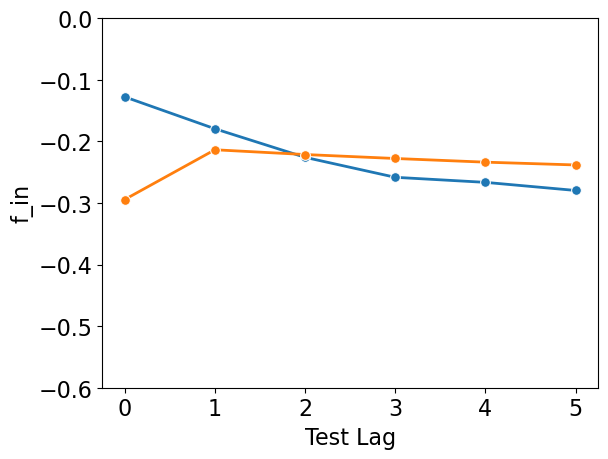

In [55]:
sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
plt.ylim([-0.6,0])
plt.xlabel('Test Lag')
plt.ylabel('f_in')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

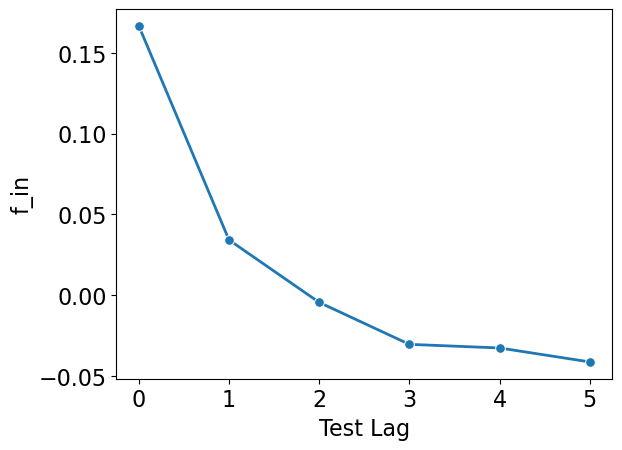

In [56]:
sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('f_in')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

In [57]:
df_laggp = df_simu.groupby(['lag']).correct.mean().to_frame(name='corr_rate').reset_index()
df_laggp

,lag,corr_rate
0,0,0.852337
1,1,0.479698
2,2,0.314608
3,3,0.236565
4,4,0.237263
5,5,0.225124


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

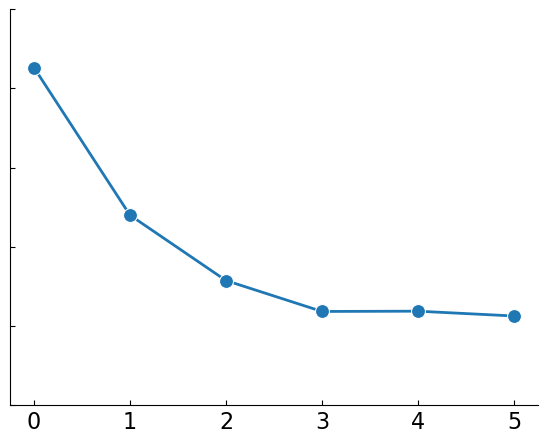

In [58]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp, x='lag', y='corr_rate', linewidth=2, marker='o', markersize = 10)
plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('Probablility of Recall')
ax.set(xlabel=None, ylabel=None)
plt.tick_params(labelleft=False)

# plt.savefig('simu5_fig/simu5_recall.pdf')
plt.show()